# Import Library
-----
-----

In [1]:
#import cv2,os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import keras
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications import MobileNetV2,mobilenet_v2

import matplotlib.image as mpimg
from matplotlib import image
from PIL import Image , ImageFont


from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer

#import plotly.graph_objects as go
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow .keras.preprocessing.image import img_to_array,load_img

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input, ZeroPadding2D, Dropout,AveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

 
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score,f1_score, confusion_matrix
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19 


In [2]:
SEED = np.random.seed(1)
tf.random.set_seed(SEED)

# Read the dataset 
----

In [3]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [4]:
train = ImageDataGenerator(rescale=1./255)
train_generator =  train.flow_from_directory(
    '/Users/ajwad/Desktop/distracted-driver-detection/train',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='sparse')

Found 22424 images belonging to 10 classes.


# Prepare Images for Modeling
----

In [5]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    return x

In [6]:
images = []
labels = []

directory = os.fsencode('/Users/ajwad/Desktop/distracted-driver-detection/train')

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'/Users/ajwad/Desktop/distracted-driver-detection/train/{label}'):
        img_name = os.fsdecode(img)
        images.append(prepare_image(f'/Users/ajwad/Desktop/distracted-driver-detection/train/{label}/{img_name}'))
        labels.append(label)

In [7]:
label_0_9 = [int(labels[w].replace('c0', "0").replace("c1",'1').replace("c2",'2').replace("c3",'3').replace("c4",'4')
                .replace("c5",'5').replace("c6",'6').replace("c7",'7').replace("c8",'8').replace("c9",'9')) for w in range(len(labels))]
label_0_9

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [8]:
len(label_0_9)

22424

In [9]:
X, Y = images, label_0_9

In [10]:
X = np.array(X)
Y = np.array(Y)

In [11]:
open_file = open("X_150x150.txt", "wb")
pickle.dump(X, open_file)
open_file.close()

In [12]:
open_file = open("Y_150x150.txt", "wb")
pickle.dump(Y, open_file)
open_file.close()

In [13]:
with open("X_150x150.txt", "rb") as fp: 
    x = pickle.load(fp)

In [14]:
with open("Y_150x150.txt", "rb") as fp: 
    y= pickle.load(fp)

In [15]:
x.shape

(22424, 150, 150, 3)

In [16]:
y.shape

(22424,)

# Split Data
----

In [17]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 30)

x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train, test_size=0.2, random_state= 30)

In [18]:
# Checking the shapes of the datasets

# m_train = x_train.shape[0]
# num_px = x_train.shape[1]
# m_val = x_val.shape[0]
# m_test = x_test.shape[0]

# print ("Number of training samples: " + str(m_train))
# print ("Number of validation samples: " + str(m_val))
# print ("Number of testing samples: " + str(m_test))

print ("train_images shape: " + str(x_train.shape))
print ("train_labels shape: " + str(y_train.shape))
print ("val_images shape: " + str(x_val.shape))
print ("val_labels shape: " + str(y_val.shape))
print ("test_images shape: " + str(x_test.shape))
print ("test_labels shape: " + str(y_test.shape))

train_images shape: (14351, 150, 150, 3)
train_labels shape: (14351,)
val_images shape: (3588, 150, 150, 3)
val_labels shape: (3588,)
test_images shape: (4485, 150, 150, 3)
test_labels shape: (4485,)


# categorical
----

In [19]:
y_train_cat = to_categorical(y_train)

In [20]:
y_train_cat.shape

(14351, 10)

In [21]:
y_val_cat = to_categorical(y_val)

In [22]:
y_val_cat.shape

(3588, 10)

In [23]:
y_test_cat = to_categorical(y_test)

In [24]:
y_test_cat.shape

(4485, 10)

# Data Visualisation
----

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


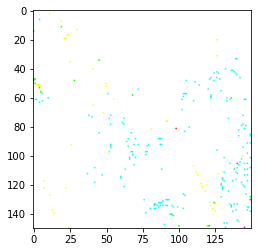

In [25]:
plt.imshow(x_train[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


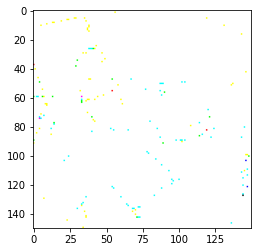

In [26]:
plt.imshow(x_val[1])

# Experiment0: Build Simple Neural Network Model - NN
----

In [27]:
NN_1= tf.keras.models.Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='softmax')])

NN_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

History = NN_1.fit(x_train, y_train_cat , epochs=2, verbose=1 )# validation_split=0.1
predict_x = NN_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Valid: {accuracy_score(y_val, classes_x)}")

2022-01-18 07:11:53.518960: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2
449/449 [==============================] - 9913s 22s/step - loss: 1690.2341 - accuracy: 0.5450
Epoch 2/2
449/449 [==============================] - 497s 1s/step - loss: 62.6800 - accuracy: 0.7558
Training: 0.4560657793881959
Valid: 0.439520624303233


In [28]:
NN_1= tf.keras.models.Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(500, activation='relu'),
                         layers.Dense(10, activation='softmax')])

NN_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

History = NN_1.fit(x_train, y_train_cat, epochs=2,validation_data=(x_val,y_val_cat))
predict_x = NN_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Valid: {accuracy_score(y_val, classes_x)}")

Epoch 1/2
449/449 [==============================] - 660s 1s/step - loss: 875.0566 - accuracy: 0.4915 - val_loss: 32.3475 - val_accuracy: 0.6282
Epoch 2/2
449/449 [==============================] - 529s 1s/step - loss: 18.4900 - accuracy: 0.7503 - val_loss: 51.0329 - val_accuracy: 0.5203
Training: 0.524632429795833
Valid: 0.520345596432553


# Experiment1: Build First Neural Network Model - Convolutional Neural Networks(CNN)
----

In [29]:
## Defining Cnn
class_names=10
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
    
  layers.Dense((class_names), activation= 'softmax') #Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.
])
#Computes the crossentropy loss between the labels and predictions.
#Optimizer to find best weights
MyCnn.compile(optimizer='adam', 
              # Anything between 2 and `steps_per_epoch` could help here.This step enhanced our results before acc=.82,val_acc=.79
              #steps_per_execution = 50,
              loss='categorical_crossentropy', metrics=['accuracy'])
#MyCnn.summary()

In [30]:
## lets train our CNN
result1 = MyCnn.fit(x_train, y_train_cat, validation_data=(x_val,y_val_cat), epochs = 3)

Epoch 1/3
449/449 [==============================] - 563s 1s/step - loss: 0.7413 - accuracy: 0.7549 - val_loss: 0.1822 - val_accuracy: 0.9543
Epoch 2/3
449/449 [==============================] - 595s 1s/step - loss: 0.0917 - accuracy: 0.9751 - val_loss: 0.0789 - val_accuracy: 0.9819
Epoch 3/3
449/449 [==============================] - 588s 1s/step - loss: 0.0409 - accuracy: 0.9877 - val_loss: 0.0589 - val_accuracy: 0.9869


In [31]:
classes = ["0","1","2","3","4","5","6","7","8","9"]

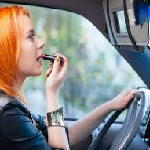

In [45]:
img = image.load_img(f"/Users/ajwad/Desktop/a1.jpeg",target_size=(150,150))
img

In [46]:
Z = image.img_to_array(img)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = MyCnn.predict([images])
ind = max(val).argmax()
print(classes[ind])

7


# Testing the best model
The best model which has the highest validation accuracy and no overfit is (CNN).
----

In [37]:
CNN_Final_model = MyCnn.fit(x_train, y_train_cat, epochs=2, verbose=1,  validation_split=0.1)

predict_x = MyCnn.predict(x_test)
classes_x = np.argmax(predict_x, axis=1)
predict_r = MyCnn.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print("=============The Final Model Test=============\n")
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"validation: {accuracy_score(y_test, classes_x)}")

Epoch 1/2
404/404 [==============================] - 476s 1s/step - loss: 0.0336 - accuracy: 0.9885 - val_loss: 0.0508 - val_accuracy: 0.9854
Epoch 2/2
404/404 [==============================] - 521s 1s/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0214 - val_accuracy: 0.9930
=============The Final Model Test=============

Training: 0.9971430562330151
validation: 0.9828316610925306
